<a href="https://colab.research.google.com/github/AarushiBhati/Stock-Prediction/blob/main/Stock_prediction_Aarushi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description; This program is used for predicting stock's future using RNN LSTM
#To predict closing stock prices of corporations using past stock prices

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Get the stock quote
df= web.DataReader('IOC.NS', data_source='yahoo' ,start='2000-01-01', end='2020-11-27' )
#Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,22.770832,20.833332,21.666666,22.570833,284400.0,9.555615
2000-01-04,22.333332,21.174999,21.666666,22.033333,292800.0,9.328058
2000-01-05,22.083332,21.416666,22.075001,21.775000,226800.0,9.218693
2000-01-06,21.916666,21.337500,21.500000,21.674999,217800.0,9.176353
2000-01-07,22.250000,21.104166,21.658333,22.037500,211800.0,9.329823
...,...,...,...,...,...,...
2020-11-23,86.650002,84.050003,85.500000,86.449997,21750853.0,86.449997
2020-11-24,87.349998,85.750000,87.000000,86.150002,17836449.0,86.150002
2020-11-25,87.099998,85.500000,86.500000,85.750000,17102078.0,85.750000


In [ ]:
df.shape


(5220, 6)

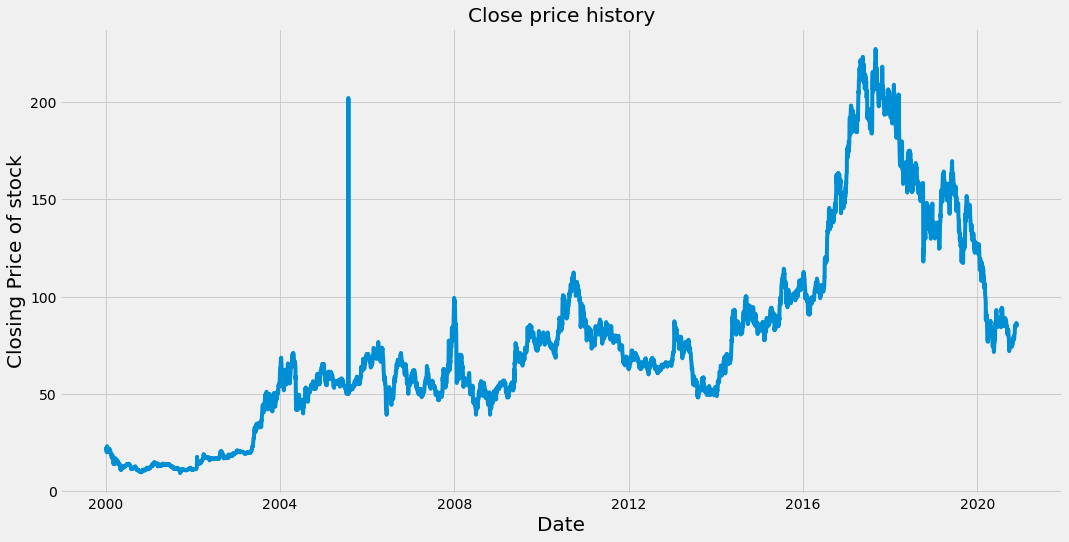

In [ ]:
#Visualize the closing plot history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Closing Price of stock',fontsize=20)
plt.show()

In [ ]:
#Create a data frame with only the close coloumn
data= df.filter(['Close'])
#Convert the data base to numpy array
dataset=data.values
#Get the nummber of rows to train the model on
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

4176

In [ ]:
#Scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.06096908],
       [0.05850433],
       [0.05731973],
       ...,
       [0.3506821 ],
       [0.34999425],
       [0.34540867]])

In [ ]:
#Create the training set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data in x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()



[array([0.06096908, 0.05850433, 0.05731973, 0.05686117, 0.05852345,
       0.05351752, 0.04908479, 0.05642172, 0.0615996 , 0.0633383 ,
       0.05898201, 0.05663189, 0.05294432, 0.055218  , 0.05569567,
       0.05458749, 0.05072796, 0.05072796, 0.05302075, 0.05263861,
       0.05193168, 0.05275325, 0.05772096, 0.05663189, 0.05598227,
       0.05451106, 0.05011655, 0.05321181, 0.05175972, 0.04954335,
       0.04497688, 0.04430815, 0.04465207, 0.04556918, 0.04148038,
       0.0392258 , 0.03634071, 0.03901563, 0.03848064, 0.03731515,
       0.04172876, 0.0421491 , 0.04226375, 0.03548092, 0.03005464,
       0.02566013, 0.02352019, 0.0217815 , 0.02392143, 0.02306164,
       0.02097902, 0.02122741, 0.02432267, 0.02216363, 0.02216363,
       0.02216363, 0.02117009, 0.02627154, 0.03148764, 0.03519432])]
[0.030379455705558528]

[array([0.06096908, 0.05850433, 0.05731973, 0.05686117, 0.05852345,
       0.05351752, 0.04908479, 0.05642172, 0.0615996 , 0.0633383 ,
       0.05898201, 0.05663189, 0.0

In [ ]:
#Convert the x-train and y_train datasets to numpy arrays
x_train ,y_train= np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(4116, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences= True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compie the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train,batch_size=1, epochs=1)

4116/4116 [==============================] - 98s 23ms/step - loss: 9.7012e-04


In [ ]:
#Create the training data set
#Create a new array containing scaled values from index 1543 to 4083
test_data=scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len,:]
for i in range(60,len(test_data)):
 x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to numpy array
x_test=np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions= model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared errror
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

10.286857042276083

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


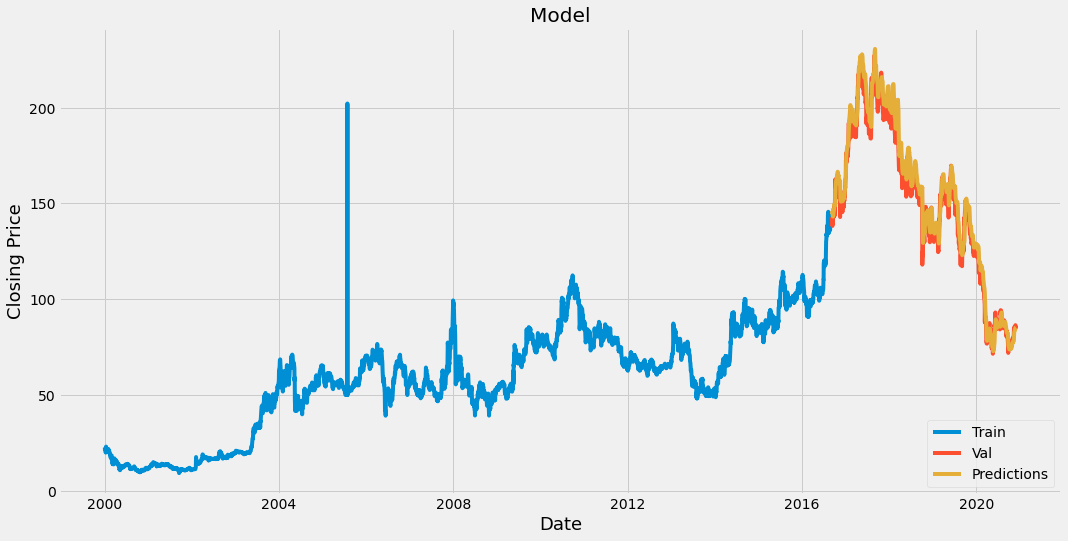

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted value
valid

,Close,Predictions
Date,,
2016-09-02,143.362503,146.344879
2016-09-06,143.300003,146.442734
2016-09-07,141.887497,146.417404
2016-09-08,140.962494,145.989334
2016-09-09,140.912506,145.314133
...,...,...
2020-11-23,86.449997,84.430931
2020-11-24,86.150002,84.794525
2020-11-25,85.750000,85.121780


In [ ]:
#Get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2000-01-03',end='2020-11-27')
#Create a new dataframe
new_df=apple_quote.filter(['Close'])
#Get the last 60 days prices and tranform the data into an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert the x_test dataset to numpy array
X_test =np.array(X_test)
#Reshape the data
X_test =np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[117.46304]]


In [ ]:
#Get the actual quote
IOC_quote2=web.DataReader('IOC.NS',data_source='yahoo',start='18-12-2019',end='18-12-2019')
print(IOC_quote2['Close'])

Date
2019-12-18    126.050003
2019-12-19    127.400002
Name: Close, dtype: float64
